In [93]:
import pandas as pd

In [94]:
df=pd.read_csv('/Users/Guchi/Documents/projects/endtoendmlproject/data.csv')

In [95]:
df.head()

,id,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,19956,23,Private,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
1,9864,43,Private,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
2,27689,49,Self-emp-not-inc,4,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
3,32524,33,Private,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,<=50K
4,11365,22,Private,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,25,United-States,<=50K


In [96]:
df.drop('id',axis=1,inplace=True)

In [97]:
numerical_column=list(df.select_dtypes(exclude='object').columns)
one_hot_column=['sex','race']
categorical_column=list(set(list(df.columns))-set(list(numerical_column + one_hot_column)))


In [98]:
print(len(numerical_column),len(one_hot_column),len(categorical_column))

5 2 6


In [99]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,23,Private,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
1,43,Private,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
2,49,Self-emp-not-inc,4,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
3,33,Private,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,<=50K
4,22,Private,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,25,United-States,<=50K


In [100]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


In [101]:
for i in df.columns:
    print(i,'\n',df[i].value_counts())

age 
 age
35    459
23    457
31    442
34    440
36    436
     ... 
82      6
84      5
83      5
85      3
86      1
Name: count, Length: 71, dtype: int64
workclass 
 workclass
Private             11332
Self-emp-not-inc     1278
Local-gov            1030
State-gov             649
Self-emp-inc          573
Federal-gov           475
Without-pay             8
Never-worked            4
Name: count, dtype: int64
education.num 
 education.num
9     5209
10    3657
13    2690
14     861
11     664
7      617
12     527
6      475
4      321
15     293
5      253
8      234
16     213
3      169
2       75
1       23
Name: count, dtype: int64
marital.status 
 marital.status
Married-civ-spouse       7446
Never-married            5347
Divorced                 2278
Separated                 495
Widowed                   483
Married-spouse-absent     222
Married-AF-spouse          10
Name: count, dtype: int64
occupation 
 occupation
Craft-repair         2070
Prof-specialty       2050
Exec-manag

In [102]:
df.isna().sum()

age                 0
workclass         932
education.num       0
marital.status      0
occupation        936
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    300
income              0
dtype: int64

In [103]:
for i in df.columns:
    if df[i].dtype =='object':
        df[i].fillna(df[i].mode()[0],inplace=True)
    else:
        df[i].fillna(df[i].mean(),inplace=True)

In [104]:
df.isna().sum()

age               0
workclass         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

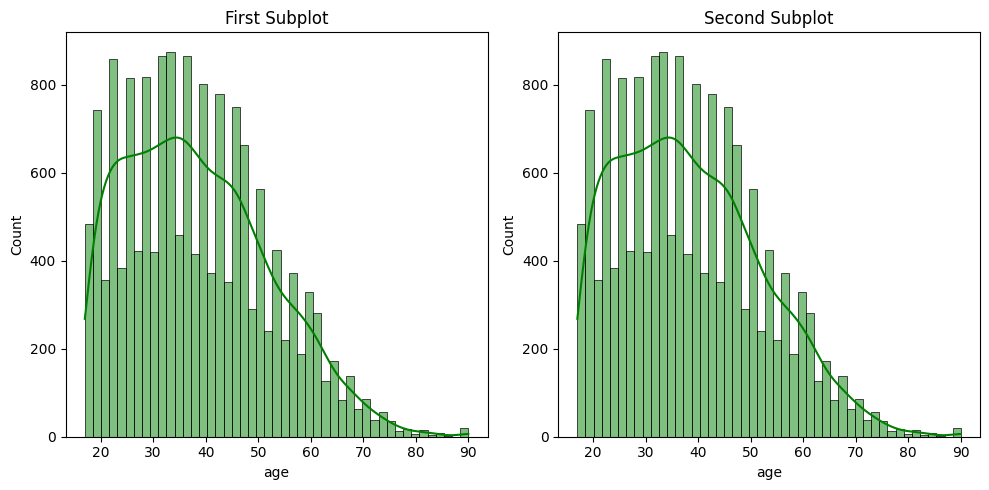

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# First subplot (1st column)
plt.subplot(121)
sns.histplot(data=df, x='age', kde=True, color='g')
plt.title('First Subplot')

# Second subplot (2nd column)
plt.subplot(122)
sns.histplot(data=df, x='age', kde=True, color='g')
plt.title('Second Subplot')

plt.tight_layout()  # Ensures the subplots do not overlap
plt.show()


In [107]:
df

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,23,Private,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
1,43,Private,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
2,49,Self-emp-not-inc,4,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
3,33,Private,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,<=50K
4,22,Private,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,25,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,23,Private,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
16277,49,Self-emp-not-inc,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,70,United-States,<=50K
16278,54,Private,10,Married-civ-spouse,Sales,Husband,White,Male,0,2415,50,United-States,>50K
16279,30,Self-emp-inc,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,52,United-States,>50K


In [108]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OrdinalEncoder
lb=LabelEncoder()
on=OneHotEncoder(drop='first')
st=StandardScaler()

In [109]:
onehot_feature=['sex','race']
standarad_feature=list(df.select_dtypes(exclude='object').columns)

In [110]:
numerical_column=list(df.select_dtypes(exclude='object').columns)
one_hot_column=['sex','race']
categorical_column=list(set(list(df.columns))-set(list(numerical_column + one_hot_column)))
           

In [111]:
from sklearn.compose import ColumnTransformer
processor=ColumnTransformer(
    transformers=[('cat',OneHotEncoder(sparse=False,drop='first'),onehot_feature),
    ('label',OrdinalEncoder(),label_feature),
    ('stand',MinMaxScaler(),standarad_feature)],remainder='drop')


In [112]:
df=df.drop('income',axis=1)

In [113]:
transformed_df = pd.DataFrame(processor.fit_transform(df), columns=list(processor.get_feature_names_out()))
transformed_df

ValueError: A given column is not a column of the dataframe

In [ ]:
from sklearn.linear_model import  LogisticRegression
lg=LogisticRegression()
lg.fit()